In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import pandas as pd
import datetime as dt
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import numpy as np

In [9]:
tcs_nov=pd.read_csv("/home/pogo/Desktop/Ba/Desktop/Books/Capstone/Phase 2/Parallel/Data/STOCKS/AIRTEL_All.csv",usecols=['Date','Close'])
tcs_oct=pd.read_csv("/home/pogo/Desktop/Ba/Desktop/Books/Capstone/Phase 2/Parallel/Data/STOCKS/AIRTEL.csv",usecols=['Date','Close'])
df_read=pd.concat([tcs_nov,tcs_oct],axis=0)
df_read

,Date,Close
0,2016-01-01,312.639740
1,2016-01-04,300.060699
2,2016-01-05,296.984802
3,2016-01-06,295.837067
4,2016-01-07,295.974792
...,...,...
15,2021-01-22,576.849976
16,2021-01-25,580.750000
17,2021-01-27,570.799988
18,2021-01-28,570.900024


In [10]:
df_read=df_read.reset_index(drop=True)
df_read.dropna(inplace=True)
df_read1=df_read.copy()

In [11]:
fore=df_read1[df_read1['Date']>='2021-01-01'].shape[0]
df_read1['Prediction'] = df_read1[['Close']].shift(-fore)
df_read1

,Date,Close,Prediction
0,2016-01-01,312.639740,272.331696
1,2016-01-04,300.060699,277.473511
2,2016-01-05,296.984802,275.269867
3,2016-01-06,295.837067,279.355774
4,2016-01-07,295.974792,282.064392
...,...,...,...
1249,2021-01-22,576.849976,NaN
1250,2021-01-25,580.750000,NaN
1251,2021-01-27,570.799988,NaN
1252,2021-01-28,570.900024,NaN


In [12]:
def date_float(x):
    time_tuple = time.strptime(x, "%Y-%m-%d")
    timestamp = time.mktime(time_tuple)
    return timestamp

In [13]:
X1=df_read1[['Close','Prediction']]
X = np.array(X1.drop(['Prediction'],1))
X = X[:-fore]
print(X)

[[312.63974 ]
 [300.060699]
 [296.984802]
 ...
 [520.25    ]
 [516.150024]
 [509.700012]]


In [14]:
y = np.array(df_read1['Prediction'])
y = y[:-fore]
print(y)

[272.331696 277.473511 275.269867 ... 570.799988 570.900024 553.599976]


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)

In [16]:
svr = SVR(kernel='rbf',gamma=0.005, C=100)
svr.fit(x_train, y_train)

SVR(C=100, gamma=0.005)

In [17]:
svm_confidence = svr.score(x_test, y_test)
print("svm confidence: ", round(svm_confidence,2))

svm confidence:  0.81


In [18]:
X2=df_read1[['Close','Prediction']]
forecast = np.array(X2.drop(['Prediction'],1))[-fore:]
print(forecast)

[[515.150024]
 [517.099976]
 [514.      ]
 [525.299988]
 [545.25    ]
 [540.25    ]
 [547.150024]
 [565.75    ]
 [578.25    ]
 [580.549988]
 [602.650024]
 [586.950012]
 [592.299988]
 [596.150024]
 [581.349976]
 [576.849976]
 [580.75    ]
 [570.799988]
 [570.900024]
 [553.599976]]


In [19]:
svm_prediction = svr.predict(forecast)
print(svm_prediction)

[521.07193459 510.81823118 526.64036402 478.28487791 504.22150126
 492.7766962  512.06102815 550.86809283 566.55797041 570.4475414
 544.548905   573.59544006 573.63191741 570.26589091 571.37451092
 563.39400085 570.69962023 549.76765536 549.89895614 546.2912697 ]


In [20]:
a1=df_read1[df_read1['Date']>='2021-01-01']
a1

,Date,Close,Prediction
1234,2021-01-01,515.150024,NaN
1235,2021-01-04,517.099976,NaN
1236,2021-01-05,514.000000,NaN
1237,2021-01-06,525.299988,NaN
1238,2021-01-07,545.250000,NaN
1239,2021-01-08,540.250000,NaN
1240,2021-01-11,547.150024,NaN
1241,2021-01-12,565.750000,NaN
1242,2021-01-13,578.250000,NaN
1243,2021-01-14,580.549988,NaN


In [21]:
def p_chan(x,y):
    return ((y-x)/x)*100

In [22]:
c=pd.DataFrame()
c['Date']=list(a1['Date'])
c['Predicted']=list(svm_prediction)
c['Actual Close']=list(a1['Close'])

In [23]:
diff=[]
for i in range(len(list(c['Predicted']))):
    diff.append(p_chan(list(c['Actual Close'])[i],list(c['Predicted'])[i]))
c['Difference']=diff
c

,Date,Predicted,Actual Close,Difference
0,2021-01-01,521.071935,515.150024,1.149551
1,2021-01-04,510.818231,517.099976,-1.214803
2,2021-01-05,526.640364,514.000000,2.459215
3,2021-01-06,478.284878,525.299988,-8.950145
4,2021-01-07,504.221501,545.250000,-7.524713
5,2021-01-08,492.776696,540.250000,-8.787284
6,2021-01-11,512.061028,547.150024,-6.413048
7,2021-01-12,550.868093,565.750000,-2.630474
8,2021-01-13,566.557970,578.250000,-2.021968
9,2021-01-14,570.447541,580.549988,-1.740151


In [24]:
def accuracy(x):
    if x<0:
        return 100+x
    else:
        return 100-x

In [25]:
accu=[]
for i in range(len(list(c['Difference']))):
    accu.append(accuracy(list(c['Difference'])[i]))
c['Accuracy']=accu
c

,Date,Predicted,Actual Close,Difference,Accuracy
0,2021-01-01,521.071935,515.150024,1.149551,98.850449
1,2021-01-04,510.818231,517.099976,-1.214803,98.785197
2,2021-01-05,526.640364,514.000000,2.459215,97.540785
3,2021-01-06,478.284878,525.299988,-8.950145,91.049855
4,2021-01-07,504.221501,545.250000,-7.524713,92.475287
5,2021-01-08,492.776696,540.250000,-8.787284,91.212716
6,2021-01-11,512.061028,547.150024,-6.413048,93.586952
7,2021-01-12,550.868093,565.750000,-2.630474,97.369526
8,2021-01-13,566.557970,578.250000,-2.021968,97.978032
9,2021-01-14,570.447541,580.549988,-1.740151,98.259849


In [26]:
print("Accuracy is",c['Accuracy'].mean())

Accuracy is 96.16180524995406


<ipython-input-27-2dad30d29daa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['Date'] = pd.DatetimeIndex(c1.Date)


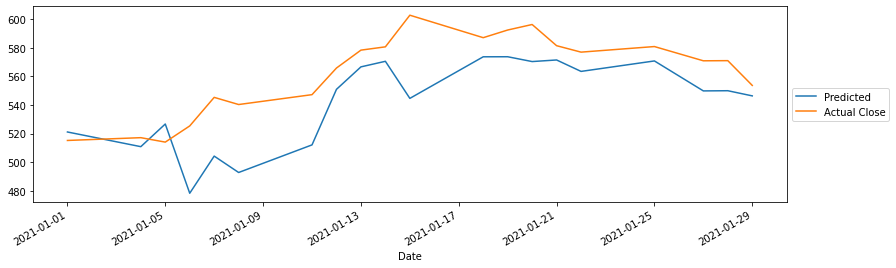

In [27]:
#svm_confidence,c['Accuracy'].mean()
import seaborn as sns

c1=c[['Date','Predicted','Actual Close']]
c1['Date'] = pd.DatetimeIndex(c1.Date)
c1 = c1.set_index('Date')

fig, ax = plt.subplots(figsize=(9,4))
c1.plot(ax=ax)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.5, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))